In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset from an Excel file (replace 'your_data.xlsx' with the actual filename)
data = pd.read_excel("C:/Users/jonim/Downloads/Data_User_Modeling_Dataset.xls", sheet_name='Training_Data')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jonim/Downloads/Data_User_Modeling_Dataset.xls'

In [ ]:
#convert string to numerical 

# Create a DataFrame with the original labels
df = pd.DataFrame({'label': ['very_low', 'Low', 'Middle', 'High']})

# Define a dictionary to map labels to numerical values
label_mapping = {'very_low': 0, 'Low': 1, 'Middle': 2, 'High': 3}

# Replace the 'label' column with numerical values
df['label'] = df['label'].map(label_mapping)

# Print the modified DataFrame
print(df)


   label
0      0
1      1
2      2
3      3


In [ ]:
# Select the "STG" and "PEG" features for training
# Select the 1st and 4th columns as features for training (excluding the first row)
X = data.iloc[:, [0, 4]]  # Start from the 2nd row (index 1), columns 1 (STG) and 4 (LPR)

# Select the last row as the true labels
y = data.iloc[:, 5]

# Print the extracted X and y
print("Features (X):")
print(X)

print("\nTrue Labels (y):")
print(y)

# Map the string labels to numerical values in the 'y' column
y = y.map(label_mapping)

print("\nTrue Labels (y):")
print(y)

Features (X):
      STG   PEG
0    0.00  0.00
1    0.08  0.90
2    0.06  0.33
3    0.10  0.30
4    0.08  0.24
..    ...   ...
253  0.61  0.58
254  0.78  0.60
255  0.54  0.77
256  0.50  0.26
257  0.66  0.74

[258 rows x 2 columns]

True Labels (y):
0      very_low
1          High
2           Low
3        Middle
4           Low
         ...   
253        High
254      Middle
255        High
256      Middle
257        High
Name:  UNS, Length: 258, dtype: object

True Labels (y):
0      0
1      3
2      1
3      2
4      1
      ..
253    3
254    2
255    3
256    2
257    3
Name:  UNS, Length: 258, dtype: int64


In [ ]:
# Split the data into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Perceptron model
# Create a Perceptron model with custom parameters
# perceptron = Perceptron(alpha=4, max_iter=200, tol=10, eta0=10, random_state=42)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predict labels on the test set
y_pred = perceptron.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, perceptron.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(train_accuracy)
print(test_accuracy)


0.5833333333333334
0.5512820512820513


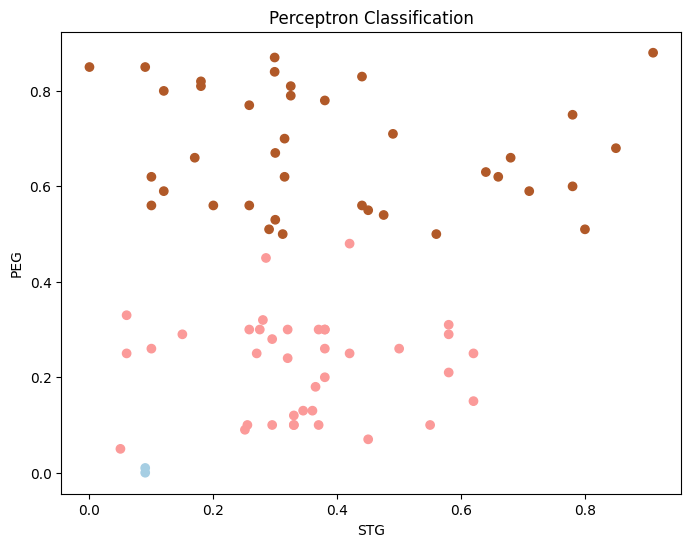

In [ ]:
# Plot the classification outcome
plt.figure(figsize=(8, 6))
plt.scatter(X_test['STG'], X_test['PEG'], c=y_pred, cmap=plt.cm.Paired)
plt.xlabel('STG')
plt.ylabel('PEG')
plt.title('Perceptron Classification')
plt.savefig('classification_plot.png')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Define a list of parameter values to experiment with (e.g., test_sizes)
parameter_values = [0.1, 0.2, 0.3]

# Create an empty list to store results
results = []

# Iterate through different parameter values
for param_value in parameter_values:
    # Split the data using the current parameter value
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=param_value, random_state=42)
    
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
    
    # Predict labels on the test set
    y_test_pred = perceptron.predict(X_test)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Log the results in a dictionary
    result = {'Parameter': f'Test Size={param_value}', 'Test Accuracy': test_accuracy}
    
    # Append the result dictionary to the list
    results.append(result)

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('parameter_accuracy.xlsx', index=False)

print(results_df)


       Parameter  Test Accuracy
0  Test Size=0.1       0.653846
1  Test Size=0.2       0.653846
2  Test Size=0.3       0.551282


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define your parameter grid to search over
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4],
    'eta0': [0.1, 0.01],
    'random_state': [42]  # Fixed random state for reproducibility
}

# Create an empty list to store results
results = []

# Perform grid search with cross-validation (e.g., 5-fold cross-validation)
for i in range(10):  # Perform 10 tests
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Create a Perceptron model
    perceptron = Perceptron()
    
    # Perform grid search
    grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and its test accuracy
    best_estimator = grid_search.best_estimator_
    y_test_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Log the results in a dictionary
    result = {
        'Test Number': i + 1,
        'Best Parameters': grid_search.best_params_,
        'Test Accuracy': test_accuracy
    }
    
    # Append the result dictionary to the list
    results.append(result)

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('parameter_accuracy_grid_search.xlsx', index=False)

# Find the highest test accuracy and corresponding parameters
best_result = results_df.loc[results_df['Test Accuracy'].idxmax()]
print("Best Test Accuracy:")
print(best_result)

Best Test Accuracy:
Test Number                                                        7
Best Parameters    {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 10...
Test Accuracy                                               0.673077
Name: 6, dtype: object
